In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("./data/체류시간.xlsx")
df.head()

,항목,조회수,사용자,사용자당 조회수,사용자당 평균 참여 시간
0,홈화면,0.2266,0.8959,70.77,6분 22초
1,로그인화면,0.0039,0.7007,1.55,5초
2,종목상세,0.2386,0.6387,104.53,24분 41초
3,휴대폰인증,0.0025,0.5300,1.33,27초
4,마케팅 약관동의화면,0.0026,0.5030,1.46,4초


In [3]:
#사용자당 평균 참여 시간 분 변환
import re

def time_to_min(t):
    if pd.isna(t):
        return 0
    m = re.search(r"(\d+)분", str(t))
    s = re.search(r"(\d+)초", str(t))
    minutes = int(m.group(1)) if m else 0
    seconds = int(s.group(1)) if s else 0
    return minutes + seconds/60

df["체류시간_min"] = df["사용자당 평균 참여 시간"].apply(time_to_min)

In [4]:
df.head()

,항목,조회수,사용자,사용자당 조회수,사용자당 평균 참여 시간,체류시간_min
0,홈화면,0.2266,0.8959,70.77,6분 22초,6.366667
1,로그인화면,0.0039,0.7007,1.55,5초,0.083333
2,종목상세,0.2386,0.6387,104.53,24분 41초,24.683333
3,휴대폰인증,0.0025,0.5300,1.33,27초,0.450000
4,마케팅 약관동의화면,0.0026,0.5030,1.46,4초,0.066667


In [5]:
#Mass Access (대중 접근성)
df["MassAccess"] = df["조회수"] + df["사용자"]

#Retention (깊이)
df["Retention"] = df["체류시간_min"] * df["사용자당 조회수"]

In [6]:
df

,항목,조회수,사용자,사용자당 조회수,사용자당 평균 참여 시간,체류시간_min,MassAccess,Retention
0,홈화면,0.2266,0.8959,70.77,6분 22초,6.366667,1.1225,450.569000
1,로그인화면,0.0039,0.7007,1.55,5초,0.083333,0.7046,0.129167
2,종목상세,0.2386,0.6387,104.53,24분 41초,24.683333,0.8773,2580.148833
3,휴대폰인증,0.0025,0.5300,1.33,27초,0.450000,0.5325,0.598500
4,마케팅 약관동의화면,0.0026,0.5030,1.46,4초,0.066667,0.5056,0.097333
5,회원가입-프로필,0.0021,0.4912,1.20,22초,0.366667,0.4933,0.440000
6,가입경로,0.0020,0.4882,1.15,15초,0.250000,0.4902,0.287500
7,캘린더,0.1291,0.4872,74.17,12분 17초,12.283333,0.6163,911.054833
8,회원가입 완료 페이지,0.0017,0.4777,1.01,2초,0.033333,0.4794,0.033667
9,회원가입 후 듀토리얼페이지,0.0017,0.4734,1.02,5초,0.083333,0.4751,0.085000


# ✅이상값 확인

In [7]:
df[["MassAccess","Retention"]].describe()

,MassAccess,Retention
count,42.000000,42.000000
mean,0.251624,120.946020
std,0.260231,427.421953
min,0.006200,0.033667
25%,0.060300,0.322750
50%,0.134500,1.175833
75%,0.438400,13.611750
max,1.122500,2580.148833


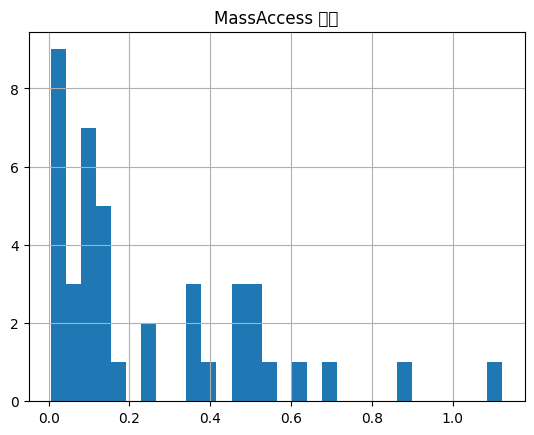

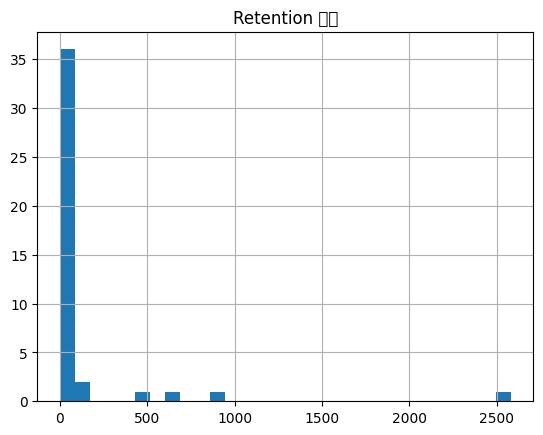

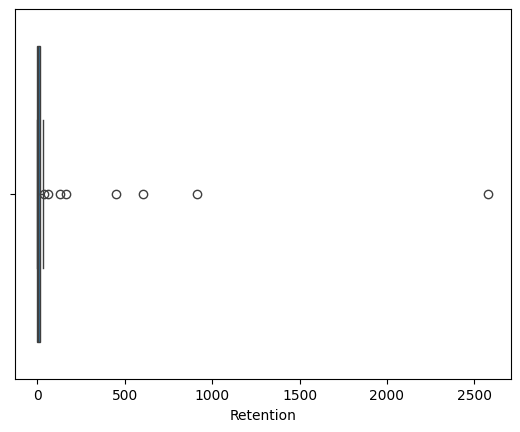

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


df["MassAccess"].hist(bins=30)
plt.title("MassAccess 분포")
plt.show()

df["Retention"].hist(bins=30)
plt.title("Retention 분포")
plt.show()

sns.boxplot(x=df["Retention"])
plt.show()

# ✅로그 변환
* 이상값 확인되어(Retention 종목상세) 로그 변환 진행
* 중요한 값이기에 항목 삭제보다 로그 변환 선택

In [9]:
import numpy as np

df["MassAccess_log"] = np.log1p(df["MassAccess"])
df["Retention_log"] = np.log1p(df["Retention"])

df[["MassAccess","MassAccess_log","Retention","Retention_log"]].head()

,MassAccess,MassAccess_log,Retention,Retention_log
0,1.1225,0.752595,450.569000,6.112728
1,0.7046,0.533330,0.129167,0.121480
2,0.8773,0.629835,2580.148833,7.855990
3,0.5325,0.426900,0.598500,0.469066
4,0.5056,0.409191,0.097333,0.092883


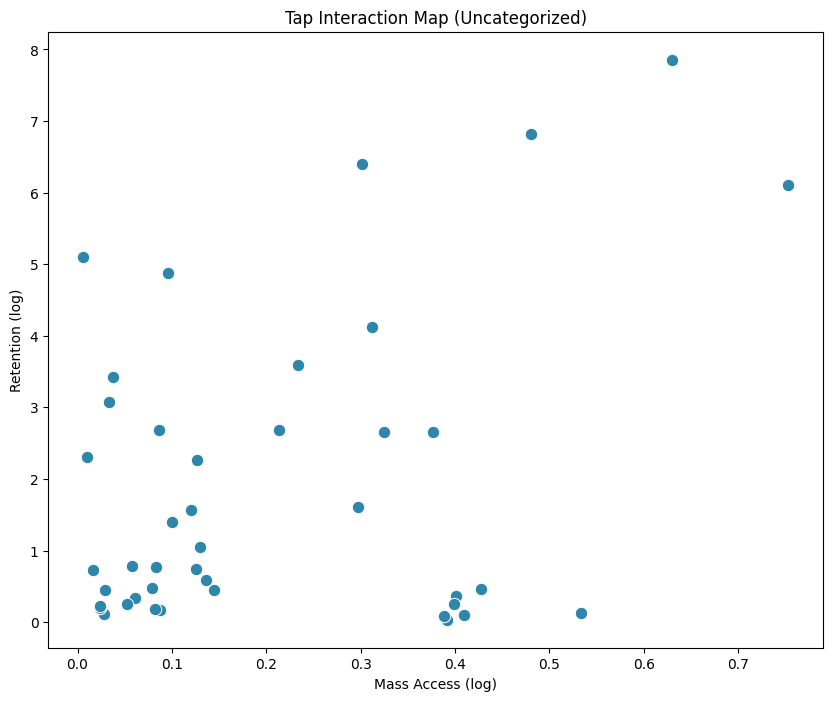

In [10]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data=df,
    x="MassAccess_log",
    y="Retention_log",
    s=80,
    color="#2E86AB"
)

plt.xlabel("Mass Access (log)")
plt.ylabel("Retention (log)")
plt.title("Tap Interaction Map (Uncategorized)")

plt.show()

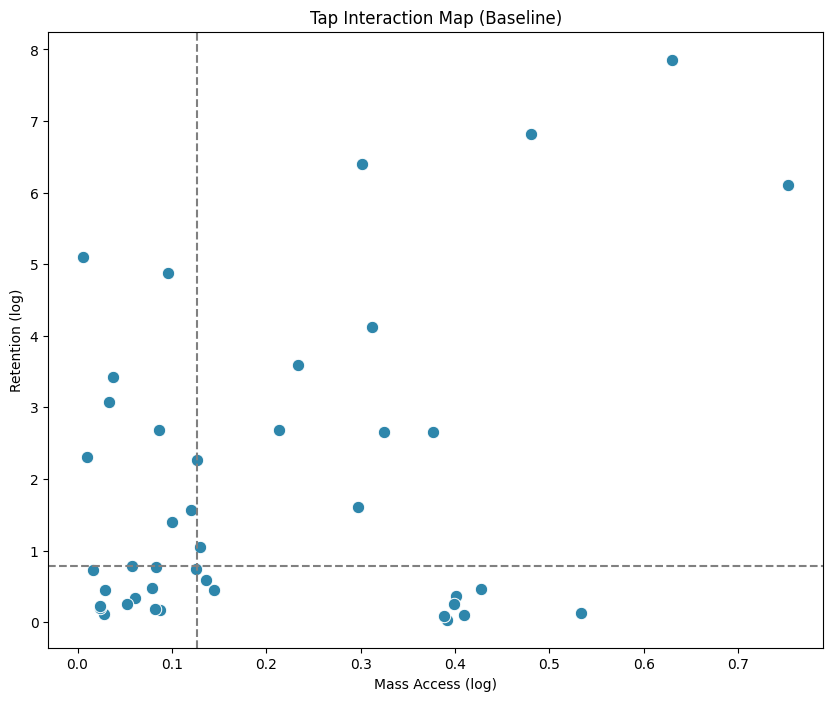

In [11]:
x_mid = df["MassAccess_log"].median()
y_mid = df["Retention_log"].median()

plt.figure(figsize=(10,8))

sns.scatterplot(
    data=df,
    x="MassAccess_log",
    y="Retention_log",
    s=80,
    color="#2E86AB"
)

plt.axvline(x=x_mid, linestyle="--", color="gray")
plt.axhline(y=y_mid, linestyle="--", color="gray")

plt.xlabel("Mass Access (log)")
plt.ylabel("Retention (log)")
plt.title("Tap Interaction Map (Baseline)")

plt.show()


## 📊 Tap Interaction Map 해석
1. 목적: 공모주 비수기에도 지속적으로 소비될 가능성이 높은 탭을 식별
2. 축 설정
    * X축 — Mass Access: 대중적으로 얼마나 많이 접근되는지 나타내는 지표(조회수 비중 + 사용자 비중 기반)
    * Y축 — Retention: 사용자가 얼마나 깊게 소비하는지 나타내는 지표(체류시간 × 사용자당 조회수 기반)
3. 해석
1) 오른쪽 아래 영역(Mass Access 높음 / Retention 낮음)
    * 많은 사용자가 접근하지만 체류는 길지 않은 영역
    * 허브 화면, 기능성 탭, 이벤트성 화면일 가능성이 높음
    * 공모주 성수기 트래픽에 영향을 받을 가능성이 크며 비수기 체류형 콘텐츠 후보로는 적합하지 않음
2) 오른쪽 위 영역(Mass Access 높음 / Retention 높음)
    * 대중적 접근성과 깊은 소비가 동시에 발생하는 영역
    * 핵심 시장 탐색 기능 또는 주요 정보 허브일 가능성이 있음
    * 성수기 트래픽 영향이 존재할 수 있어 비수기 전용 콘텐츠 후보라기보다 핵심 기능군에 가까움
3) ⭐ 왼쪽 위 영역(Mass Access 낮음 / Retention 높음)
    * 대중 트래픽은 낮지만 깊게 소비되는 탭들이 위치
    * 특정 이벤트 의존도가 상대적으로 낮을 가능성이 있으며 비수기에도 사용자 체류를 유지할 수 있는 잠재 콘텐츠 영역으로 해석
    * **본 분석에서 비수기 콘텐츠 후보군은 이 영역을 기준으로 도출한다.**
4) 왼쪽 아래 영역(Mass Access 낮음 / Retention 낮음)
    * 사용자 접근성과 체류 수준이 모두 낮은 영역
    * 보조 기능이나 단발성 화면일 가능성이 높으며 비수기 체류 콘텐츠 후보로는 우선순위가 낮은 영역으로 해석된다.

# ✅비수기 콘텐츠 영역 후보 도출

In [12]:
offseason_candidates = df[
    (df["MassAccess_log"] <= x_mid) &
    (df["Retention_log"] >= y_mid)
]

offseason_candidates[["항목","MassAccess","Retention"]]

,항목,MassAccess,Retention
22,이벤트-상세보기,0.1274,3.811500
23,이벤트-결과,0.1056,3.068000
24,매매일지,0.1006,130.616667
26,시초가수익차트,0.0907,13.596000
31,스쿨 상세,0.0594,1.189500
33,리포트 상세보기,0.0386,29.520000
34,사주정보 확인 페이지,0.0343,20.584000
40,커뮤니티 글쓰기,0.0100,9.028000
41,광고보기,0.0062,163.682000


In [13]:
offseason_candidates[
    ["항목","사용자","사용자당 조회수","체류시간_min","Retention"]
].sort_values("Retention", ascending=False)

,항목,사용자,사용자당 조회수,체류시간_min,Retention
41,광고보기,0.0059,14.68,11.150000,163.682000
24,매매일지,0.0948,17.00,7.683333,130.616667
33,리포트 상세보기,0.0379,4.92,6.000000,29.520000
34,사주정보 확인 페이지,0.0337,4.98,4.133333,20.584000
26,시초가수익차트,0.0887,6.18,2.200000,13.596000
40,커뮤니티 글쓰기,0.0098,4.44,2.033333,9.028000
22,이벤트-상세보기,0.1261,2.97,1.283333,3.811500
23,이벤트-결과,0.1044,3.12,0.983333,3.068000
31,스쿨 상세,0.0590,1.83,0.650000,1.189500


# ✅비수기 콘텐츠 영역 점수 설계
* 주의사항
    * 비수기 콘텐츠 = Retention 높음 : Depth ↑
    * MassAccess 너무 높으면 감점 (성수기 의존 가능성) : MassAccess ↓
    * 사용자 너무 적으면 과대평가 방지 : Breadth 최소 확보

In [14]:
# ⭐ 비수기 점수 계산
df["OffseasonScore"] = (
    df["Retention_log"]
    - (df["MassAccess_log"] * 0.6)
    + (df["사용자"] * 0.3)
)

# 점수 순위 보기
offseason_rank = df.sort_values(
    "OffseasonScore",
    ascending=False
)

offseason_rank[["항목","OffseasonScore","Retention","MassAccess","사용자"]].head(15)

,항목,OffseasonScore,Retention,MassAccess,사용자
2,종목상세,7.669699,2580.148833,0.8773,0.6387
7,캘린더,6.673776,911.054833,0.6163,0.4872
14,캘린더중 목록,6.302821,602.842333,0.3518,0.2679
0,홈화면,5.929941,450.569000,1.1225,0.8959
41,광고보기,5.102078,163.682000,0.0062,0.0059
24,매매일지,4.850820,130.616667,0.1006,0.0948
12,청약일정,4.042647,60.900000,0.3668,0.3487
15,커뮤니티상세,3.523122,35.150667,0.2626,0.2511
33,리포트 상세보기,3.407028,29.520000,0.0386,0.0379
34,사주정보 확인 페이지,3.061827,20.584000,0.0343,0.0337


MassAccess가 지나치게 높은 탭은 서비스의 Core Navigation 성격일 가능성이 커서, 비수기 체류 콘텐츠 분석에서는 제외하고 중·저접근 영역 중심으로 점수를 계산한다.
Core 트래픽 허브(MassAccess 상위 영역)를 제외하고,비수기 체류형 콘텐츠 후보를 보기 위해 점수 재계산

In [15]:
# =========================
# 1️⃣ Core 영역 제외 (MassAccess 상위 20%)
# =========================
mass_threshold = df["MassAccess_log"].quantile(0.8)

df_noncore = df[df["MassAccess_log"] < mass_threshold].copy()

# =========================
# 2️⃣ Offseason Score 계산
# Retention 중심 + 과도한 MassAccess 감점
# + 사용자 비중으로 극단값 보정
# =========================
df_noncore["OffseasonScore"] = (
    df_noncore["Retention_log"]
    - (df_noncore["MassAccess_log"] * 0.6)
    + (df_noncore["사용자"] * 0.3)
)

# =========================
# 3️⃣ 비수기 후보 순위 출력
# =========================
offseason_rank = df_noncore.sort_values(
    "OffseasonScore",
    ascending=False
)

offseason_rank[[
    "항목",
    "OffseasonScore",
    "Retention",
    "MassAccess",
    "사용자"
]].head(15)

,항목,OffseasonScore,Retention,MassAccess,사용자
14,캘린더중 목록,6.302821,602.842333,0.3518,0.2679
41,광고보기,5.102078,163.682000,0.0062,0.0059
24,매매일지,4.850820,130.616667,0.1006,0.0948
12,청약일정,4.042647,60.900000,0.3668,0.3487
15,커뮤니티상세,3.523122,35.150667,0.2626,0.2511
33,리포트 상세보기,3.407028,29.520000,0.0386,0.0379
34,사주정보 확인 페이지,3.061827,20.584000,0.0343,0.0337
26,시초가수익차트,2.655266,13.596000,0.0907,0.0887
16,커뮤니티상세-홈에서접속,2.623562,13.617000,0.2377,0.2311
11,커뮤니티,2.573725,13.282500,0.3829,0.3640


# ⭐ Final Offseason Map

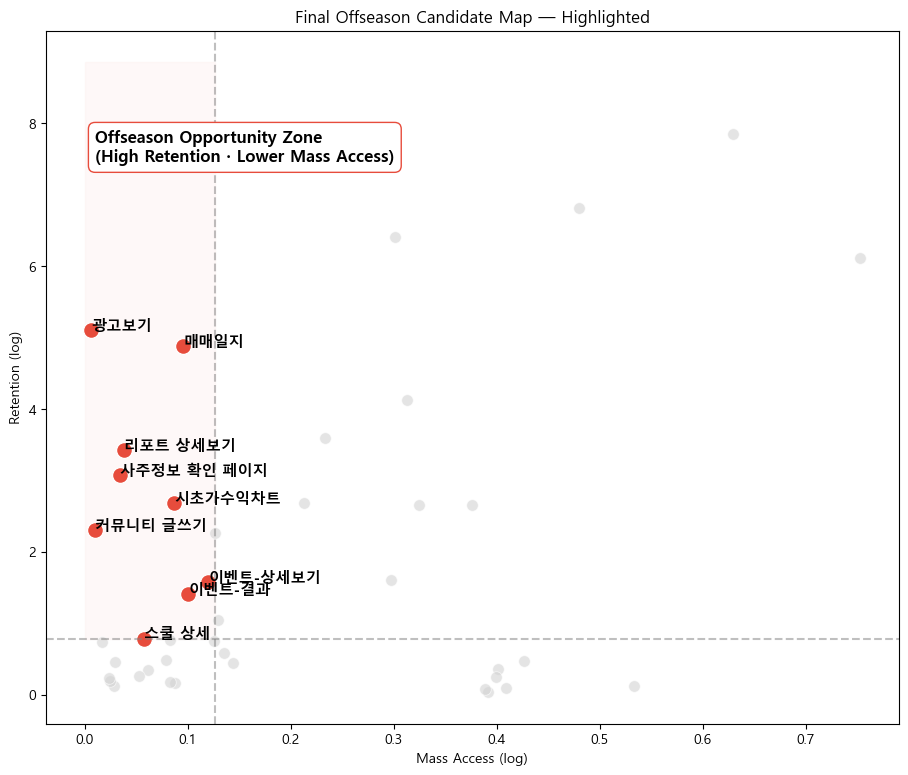

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11,9))

# =========================
# 1️⃣ 전체 점 (연하게)
# =========================
sns.scatterplot(
    data=df,
    x="MassAccess_log",
    y="Retention_log",
    color="lightgray",
    s=70,
    alpha=0.6
)

# =========================
# 2️⃣ ⭐ 왼쪽 위 영역 음영 처리
# =========================
plt.fill_between(
    [0, x_mid],            # x 범위 (왼쪽 영역)
    y_mid,                 # y 시작
    df["Retention_log"].max()+1,
    color="#FDEDEC",       # 아주 연한 레드톤
    alpha=0.35,
    zorder=0
)

# =========================
# 3️⃣ 비수기 후보 강조
# =========================
df_final = df[
    (df["MassAccess_log"] < x_mid) &
    (df["Retention_log"] > y_mid)
]

sns.scatterplot(
    data=df_final,
    x="MassAccess_log",
    y="Retention_log",
    color="#E74C3C",
    s=130
)

# =========================
# 4️⃣ 라벨 자동 배치
# =========================
texts = []
for i,row in df_final.iterrows():
    texts.append(
        plt.text(
            row["MassAccess_log"],
            row["Retention_log"],
            row["항목"],
            fontsize=11,
            weight="bold"
        )
    )

# =========================
# 5️⃣ 중앙선
# =========================
plt.axvline(x=x_mid, linestyle="--", color="gray", alpha=0.5)
plt.axhline(y=y_mid, linestyle="--", color="gray", alpha=0.5)

# =========================
# 6️⃣ ⭐ 후보 영역 텍스트 박스
# =========================
plt.text(
    0.01,
    df["Retention_log"].max()*0.95,
    "Offseason Opportunity Zone\n(High Retention · Lower Mass Access)",
    fontsize=12,
    weight="bold",
    bbox=dict(facecolor="white", edgecolor="#E74C3C", boxstyle="round,pad=0.4")
)

plt.xlabel("Mass Access (log)")
plt.ylabel("Retention (log)")
plt.title("Final Offseason Candidate Map — Highlighted")

plt.show()

# 🌟 결론 🌟
분석 결과, 공모주 비수기에는 종목 탐색보다 커뮤니티·기록·참여형 행동에서 체류가 유지되는 패턴이 확인되었으며, <br>
이에 따라 메인 숏버튼과 ‘피너츠 플레이’를 비수기 체류 레이어로 설계하고 <br>
밸런스게임·퀴즈·심리테스트·자랑하기·땅콩깨기 등 참여형 콘텐츠를 기존 경험 흐름에 연결하였다. <br>
| 콘텐츠             | 역할            | 분석 근거 (행동 패턴)          | 배치 방식                      | 전략 의도             |
| --------------- | ------------- | ---------------------- | -------------------------- | ----------------- |
| **밸런스게임**       | 커뮤니티 참여 트리거   | 커뮤니티 영역 High Retention | 메인 숏버튼 / 피너츠 플레이 / 커뮤니티 노출 | 비수기 대화 활성화        |
| **자랑하기 (매매일지)** | 개인 기록 → 공유 확장 | 매매일지 체류 깊음             | 매매일지 내부 CTA + 커뮤니티 연결      | 개인 경험을 참여 흐름으로 전환 |
| **땅콩깨기**        | 게이미피케이션 참여 루프 | 이벤트 영역 Retention 낮음 보완 | 피너츠 플레이 중심                 | 이벤트와 연계된 반복 참여 구조 |
| **사주정보 (보상)**   | 라이트 리워드 콘텐츠   | 반복 참여 유지 필요            | 땅콩깨기 보상으로 제공               | 비수기 참여 동기 강화      |
| **퀴즈**          | 참여형 학습 경험     | 정보 소비 콘텐츠 체류 높음        | 피너츠 플레이 모듈                 | 투자 관심도 유지         |
| **심리테스트**       | 가벼운 체류 콘텐츠    | Low MassAccess 영역 확장   | 메인 숏버튼 / 피너츠 플레이           | 진입 허들 낮추기         |
| **타종목 정보 연결**   | 탐색 흐름 유지(스쿨)      | 비수기 정보 부족 보완           | 보상 후 외부 링크                 | 이벤트 → 탐색 경험 연결    |
